Setting up the environment

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt

from Bio import SeqIO
from numpy import mean

%matplotlib inline

Setting up useful parameters for later

In [2]:
# Fetch the sequence records from our alignment file
records = list(SeqIO.parse("ESR1_aligned.fasta", "fasta"))

# Length of each sequence
rec_len = len(records[0].seq)
# Total number of records
rec_count = len(records)

Now, lets try to plot the rate of conservation along the sequence aligmnets we had before. To do this, we first have to determine the conservation rate per positions numerically:

In [3]:
# List to hold the conservation dictionaries per element
con_list = []
# Dictionary prototype to use when determining the counts of each acid
proto_dict = {
    'A': 0,
    'T': 0,
    'C': 0,
    'G': 0
}

# Now, for each position, we need to take a tally...
for i in range(0, rec_len):
    # Initialize a copy of the dictionary above
    count_dict = proto_dict.copy()
    # Now count, record by record, the number of each acid
    for rec in records:
        if rec.seq[i] in count_dict:
            count_dict[rec.seq[i]] += 1
    # Once that's done, save the dictionary to our list for later use
    con_list.append(count_dict)

Now we have the counts of each *relevant* nucleic acid at each position of the alignment! Now, we could just plot this directly...

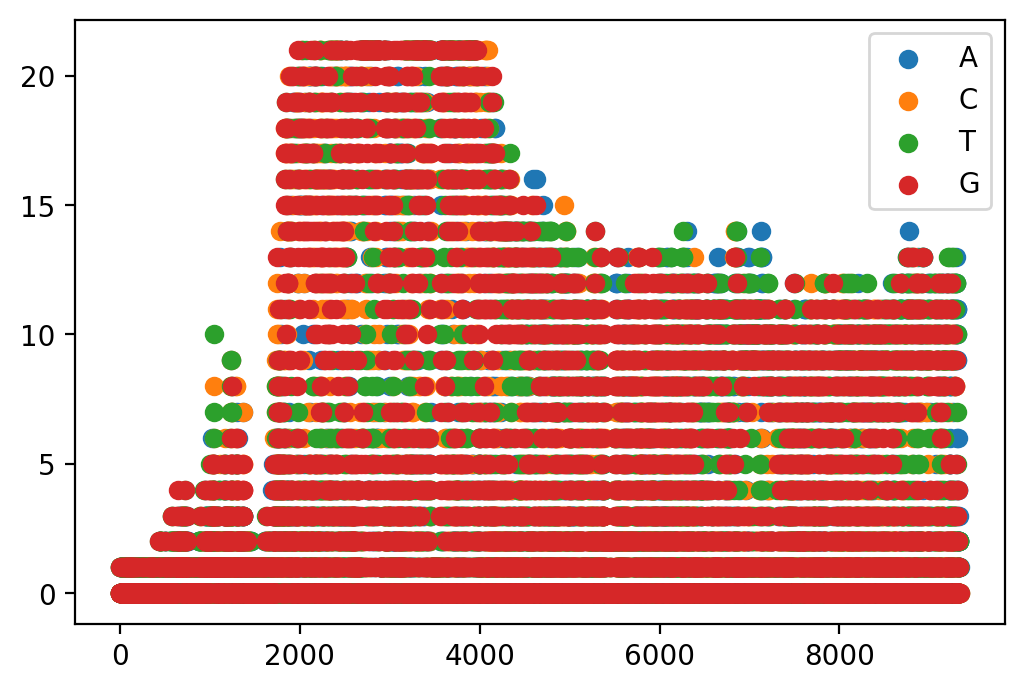

In [4]:
# Convenience variable for later
x_vals = range(0, rec_len)

# Pull out the data we saved earlier into distinct lists
a_vals = [d['A'] for d in con_list]
c_vals = [d['C'] for d in con_list]
g_vals = [d['G'] for d in con_list]
t_vals = [d['T'] for d in con_list]

# Upscale the figure
plt.figure(dpi=200)

# Plot each list as its own line
plt.scatter(x_vals, a_vals, label="A")
plt.scatter(x_vals, c_vals, label="C")
plt.scatter(x_vals, t_vals, label="T")
plt.scatter(x_vals, g_vals, label="G")

# Make a legend so we know what we're looking at
plt.legend()

# Show our plot!
plt.show()

This is, to be blunt, quite unusable. We can try other ways of plotting it, however; for example, a line plot instead...

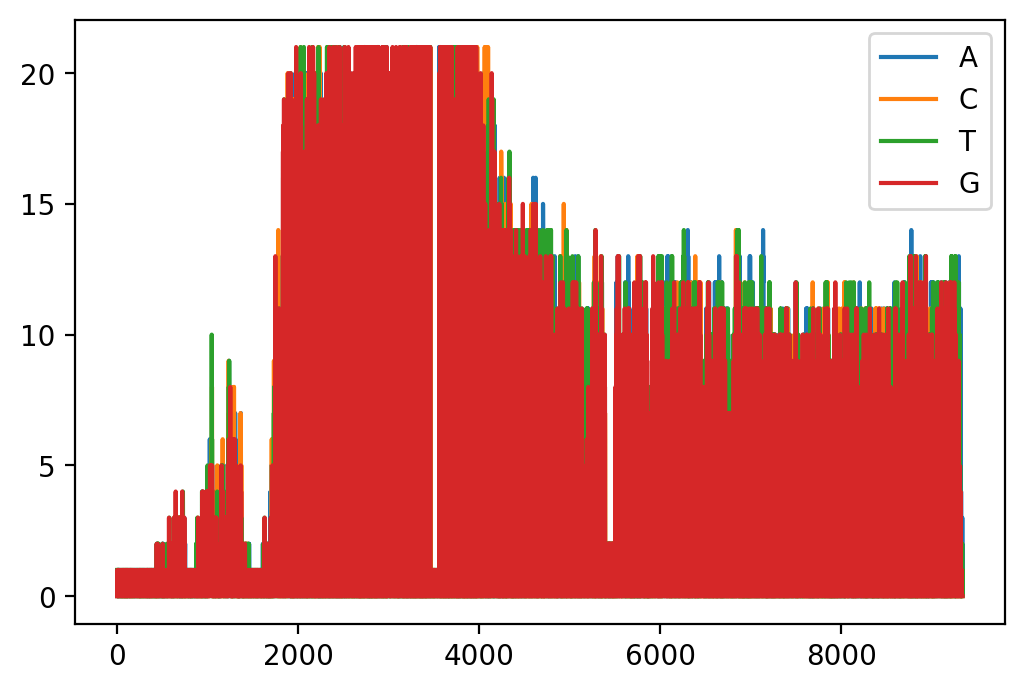

In [5]:
# Convenience variable for later
x_vals = range(0, rec_len)

# Pull out the data we saved earlier into distinct lists
a_vals = [d['A'] for d in con_list]
c_vals = [d['C'] for d in con_list]
g_vals = [d['G'] for d in con_list]
t_vals = [d['T'] for d in con_list]

# Upscale the figure
plt.figure(dpi=200)

# Plot each list as its own line
plt.plot(x_vals, a_vals, label="A")
plt.plot(x_vals, c_vals, label="C")
plt.plot(x_vals, t_vals, label="T")
plt.plot(x_vals, g_vals, label="G")

# Make a legend so we know what we're looking at
plt.legend()

# Show our plot!
plt.show()

Not much better... So, lets instead plot a *summed square conservation* for each position instead!

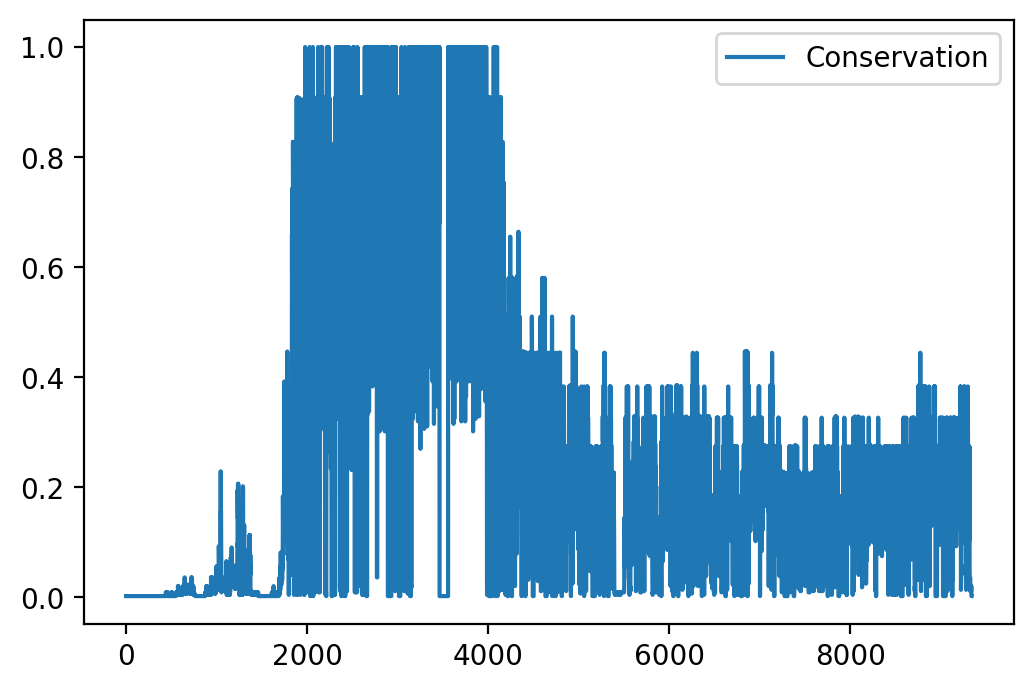

In [6]:
# Just a helper function for ease of use
def get_summed_square(data_dict):
    # The value to be returned
    sum_consv = 0;
    # Get the squared ratio of each acid in our dataset
    for val in data_dict.values():
        p = val/rec_count # The proportion (p) of this acid, 0<p<=1
        pp = p ** 2 # The square proportion (pp), 0<pp<=p<=1
        sum_consv += pp
    return sum_consv

# For each position, apply this operation to get our y axis values
y_vals = [get_summed_square(d) for d in con_list]

# Upscale the figure
plt.figure(dpi=200)

# Plot this data
plt.plot(x_vals, y_vals, label="Conservation")

# Build our new legend
plt.legend()

# Show us the plot
plt.show()

This is better, as we can start to see trends of high conservation, but we could still make it easier on the eyes via transforming the data somewhat. Smoothing is the most obvious solution (**NOTE: this greatly reduces the accuracy of your data. Doing this should be done for the purposes of helping understand the data, but NOT as a replacement for analyses on the original data**)

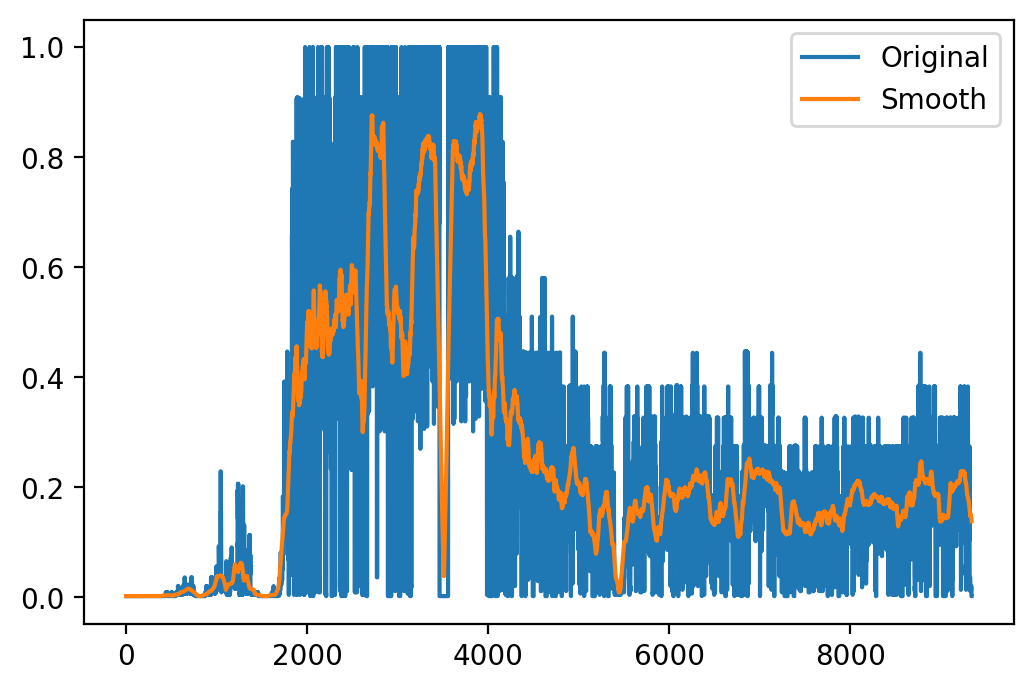

In [7]:
# Another helper function to help smooth data
# In this case, via sliding average
def smooth_data(data_list, smooth_bound):
    # Data to return after processing (avoids overwritting data)
    smoothed_data = []
    # The smooth needs to be run on a point-by-point basis
    for i in range(0, len(data_list)):
        lower = max(0, i-smooth_bound)
        upper = min(i+smooth_bound, len(data_list))
        smooth_val = mean(data_list[lower:upper])
        smoothed_data.append(smooth_val)
    return smoothed_data

# Plot everything again, now with the smoothed values
y_smoothed = smooth_data(y_vals, 50)

# Upscale the figure
plt.figure(dpi=200)

# For comparison, lets plot both the original and smoothed data
plt.plot(x_vals, y_vals, label="Original")
plt.plot(x_vals, y_smoothed, label="Smooth")

# Build our new legend
plt.legend()

# Show us the plot
plt.show()

Better already! We can see the smoothed data follows the same general trend of the original data, but is much easier to interpret. However, be careful not to smooth too much, or you might end up losing important trends:

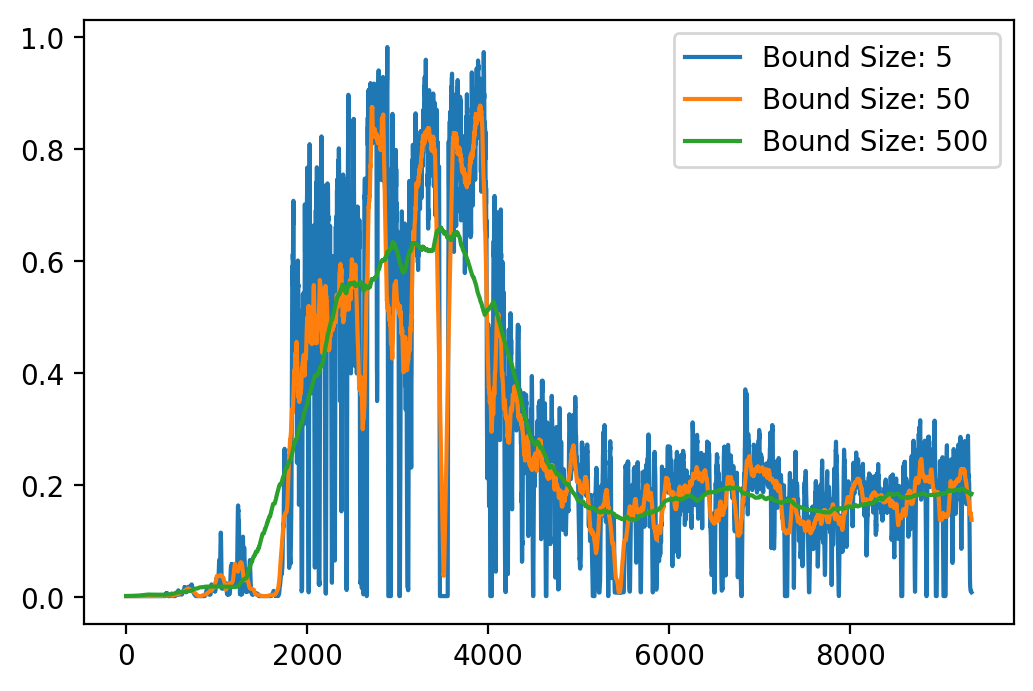

In [8]:
to_plot = {}

for i in range(0,3):
    bound = 5 * 10 ** i;
    data = smooth_data(y_vals, bound)
    to_plot[bound] = data
    
plt.figure(dpi=200)
    
for boundary, ys in to_plot.items():
    plt.plot(x_vals, ys, label=f"Bound Size: {boundary}")


plt.legend()

plt.show()

Lets say that the n=50 bound is good enough for us, and we want to pretty up the plot. We can add labels for our axis and a title like so:

[]

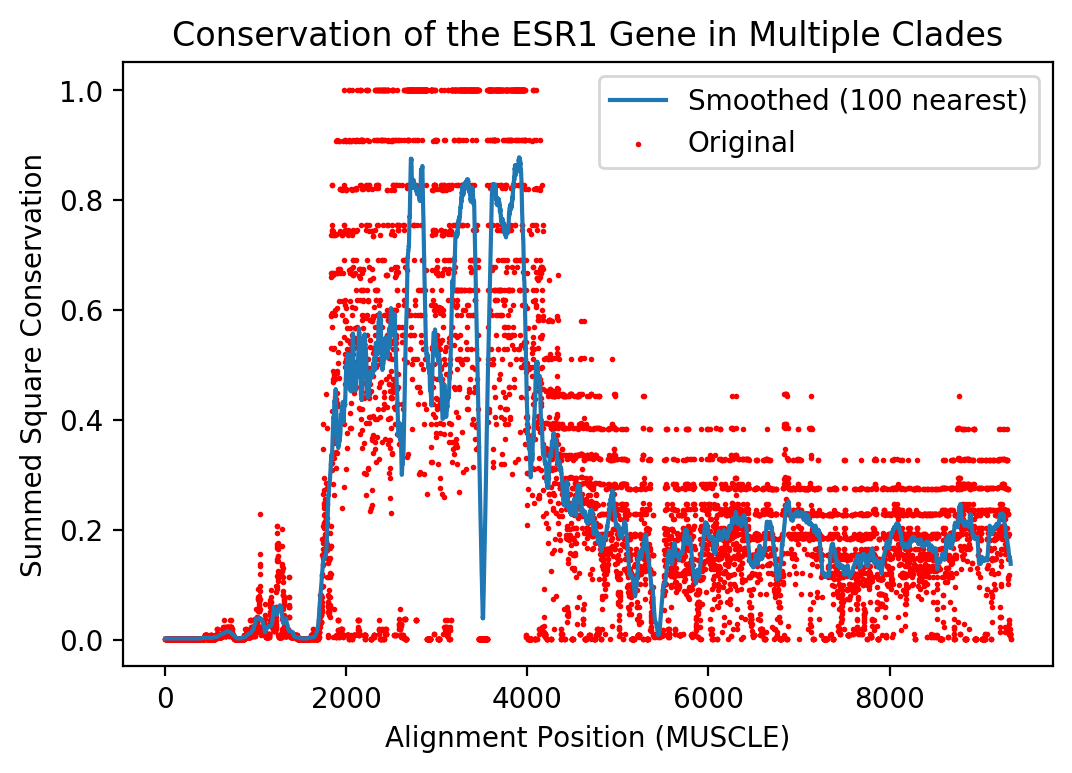

In [9]:
# Set up the size/scale of the final result (NEEDS TO BE DONE FIRST!)
plt.figure(dpi=200)

# Add our plots (you can mix them!)
plt.scatter(x_vals, y_vals, label="Original", s=1, color="red")
plt.plot(x_vals, y_smoothed, label="Smoothed (100 nearest)")

# Add our legend
plt.legend()

# Add our axis labels
plt.xlabel("Alignment Position (MUSCLE)")
plt.ylabel("Summed Square Conservation")

# Add our title
plt.title("Conservation of the ESR1 Gene in Multiple Clades")

plt.plot()

For further reference: https://matplotlib.org/index.html